### Load the Commit Statistics
For this clustering we examined 39 GitHub projects containing a total of 2,629 commits. The projects all included the Fluence Marine library. Code for Fluence is generally written in React and Rust.

In [1]:
project_root_path = '../../..'

import sys
lib_path = project_root_path + "/jupyter/lib/"
sys.path.append(lib_path)

import commit_stat_engineering
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
all_commit_logs = commit_stat_engineering.find_files('commit-stat.log.json', project_stats_dir)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

### Commit Stats


In [2]:
print(all_stats[0].keys())

dict_keys(['commit', 'totalFiles', 'binFiles', 'textFiles', 'textLines', 'javascriptFiles', 'javascriptLines', 'javascriptFilePct', 'javascriptLinePct', 'rustFiles', 'rustLines', 'rustFilePct', 'rustLinePct', 'markdownFiles', 'markdownLines', 'markdownFilePct', 'markdownLinePct', 'jsonFiles', 'jsonLines', 'jsonFilePct', 'jsonLinePct', 'imgFiles', 'imgFilePct', 'lockFiles', 'lockLines', 'lockFilePct', 'lockLinePct', 'yarnFiles', 'yarnLines', 'yarnFilePct', 'yarnLinePct', 'htmlFiles', 'htmlLines', 'htmlFilePct', 'htmlLinePct', 'clojureFiles', 'clojureLines', 'clojureFilePct', 'clojureLinePct', 'shellFiles', 'shellLines', 'shellFilePct', 'shellLinePct', 'gitignoreFiles', 'gitignoreLines', 'gitignoreFilePct', 'gitignoreLinePct', 'noextbinFiles', 'noextbinFilePct', 'noexttextFiles', 'noexttextLines', 'noexttextFilePct', 'noexttextLinePct'])


### Load Labels

In [3]:
import pandas as pd

data = pd.read_csv(project_root_path + '/sandbox/data/bob/commit_labeling.csv', sep='\t', index_col=0)
data

,wtf,rust_development,interface_development,big_json,rust_packaging,documentation,javascript_development,bulk_commit,minor_commit,cluster,...,textFiles,textLines,javascriptLinePct,rustLinePct,markdownLinePct,jsonLinePct,imgFiles,lockLinePct,yarnLinePct,htmlLinePct
12074a45bc9b22dfffbf433bb73dde6aad88e2be,1,0,0,0,0,0,0,0,1,7,...,0,0,0.0,0.00,0.0,0.0,2,0.0,0.00,0.0
e190bc9dcda78b5688b25154c1eb6e2e1febfd1c,1,0,0,0,0,0,0,0,1,7,...,0,0,0.0,0.00,0.0,0.0,0,0.0,0.00,0.0
e4807d4413c12c4b9a4600736ebd3642a8e8b2ce,1,0,0,0,0,0,0,0,1,7,...,0,0,0.0,0.00,0.0,0.0,1,0.0,0.00,0.0
5b1f6608a3ae88026b9f2bf317a80287f382e9b7,1,0,0,0,0,0,0,0,1,7,...,1,1,100.0,0.00,0.0,0.0,0,0.0,0.00,0.0
dabe94da0d22f41a555012e6ec4ef689a8c1c6e6,1,0,0,0,0,0,0,0,1,7,...,1,1,100.0,0.00,0.0,0.0,0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
088905485b5fcabd7c84fd3a7485993a2c5c3d30,1,1,0,0,0,0,0,0,0,0,...,1,41,0.0,100.00,0.0,0.0,0,0.0,0.00,0.0
5ff8d2f8d0f6a0241083616b29687a42e3d0964f,1,1,0,0,0,0,0,0,0,0,...,5,59,0.0,100.00,0.0,0.0,0,0.0,0.00,0.0
91e38c2e82d52be12fb27ece91b4d187ff7540b5,1,1,0,0,0,0,0,0,0,0,...,3,66,0.0,22.72,0.0,0.0,0,0.0,77.27,0.0
6ad2870fafbea1a580320c0835ac122ccaa7736c,1,1,0,0,0,0,0,0,0,0,...,1,84,0.0,100.00,0.0,0.0,0,0.0,0.00,0.0


### Link Labels to Stats

In [4]:
import numpy as np

features = ['binFiles','textFiles','textLines','javascriptLines','rustLines',
            'lockLines','htmlLines','jsonLines','markdownLines','imgFiles','yarnLines']

def make_x(commit_stats):
    return [np.log1p(commit_stats[feature]) for feature in features]


In [5]:
stats = {}
for commit in all_stats:
    stats[commit['commit']] = commit

X = []
Y = []
a = 0
for index, row in data.iterrows():
    #print(index)
    row_labels = row[slice(1, 9)]
    x = make_x(stats[index])
    #print(x)
    #print(a)
    X.append(make_x(stats[index]))
    Y.append(row_labels.tolist())
    a += 1
#print(a)

#print(Y[slice(2)])
#print(Y[0][0])
#print(X[slice(2)])

In [6]:
from sklearn.datasets import make_multilabel_classification

sample_X, sample_y = make_multilabel_classification(n_classes=3, random_state=0)
print(sample_y[slice(2)])
print(Y[slice(2)])

[[0 1 0]
 [0 1 0]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]


### Quick, Dumb, Check

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=10000,
                    hidden_layer_sizes=(20, 20), random_state = 1)
clf.fit(X, Y)
score = clf.score(X, Y)
Y_pred = clf.predict(X)
print('Look, Ma! I can memorize: ' + str(score))

Look, Ma! I can memorize: 1.0


### Real Performance Test

In [8]:
from sklearn.model_selection import train_test_split

random_state = 6

X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.33, random_state=random_state)

solver = 'sgd'
solver = 'lbfgs'
clf = MLPClassifier(solver=solver, alpha=1e-1, hidden_layer_sizes=(20,20,20,20),
                    random_state=random_state, max_iter=10000)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
Y_pred = clf.predict(X)
print('Score: ' + str(score))

Score: 0.7547169811320755


### Un-One-Hotting The Classes

In [9]:
rowids = data.index
columns = data.columns
class_columns = columns[slice(1,9)]
class_columns
#feature_columns = stat_keys[slice(10,len(stat_keys))]
#feature_columns

Index(['rust_development', 'interface_development', 'big_json',
       'rust_packaging', 'documentation', 'javascript_development',
       'bulk_commit', 'minor_commit'],
      dtype='object')

In [10]:

def get_class(Y_row):
    for i in range(0, len(Y_row)):
        if (Y_row[i] == 1):
            #print(i)
            return i# class_columns[i]

#for row in Y_pred:
#    print(get_class(row))
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.33, random_state=random_state)
y_train = [get_class(Y_row) for Y_row in Y_train]
y_test = [get_class(Y_row) for Y_row in Y_test]
print(y_train)
print(y_test)

[0, 3, 6, 6, 7, 5, 6, 6, 4, 1, 1, 1, 6, 5, 5, 2, 3, 3, 7, 2, 7, 6, 3, 3, 2, 0, 1, 2, 5, 4, 0, 2, 3, 2, 7, 2, 2, 6, 6, 2, 1, 3, 0, 4, 6, 6, 0, 6, 7, 0, 6, 6, 6, 2, 6, 6, 6, 4, 0, 7, 1, 5, 7, 1, 4, 0, 5, 5, 6, 2, 4, 0, 6, 7, 6, 6, 6, 1, 4, 5, 5, 1, 0, 0, 1, 2, 4, 7, 1, 1, 6, 1, 7, 5, 2, 6, 4, 4, 7, 6, 5, 4, 0, 4, 2, 2, 1]
[7, 7, 2, 4, 6, 0, 7, 7, 2, 6, 4, 6, 2, 6, 1, 0, 5, 3, 0, 4, 4, 7, 4, 6, 2, 1, 2, 1, 6, 5, 6, 5, 6, 6, 6, 7, 3, 1, 7, 7, 1, 3, 3, 6, 3, 5, 7, 6, 4, 1, 6, 4, 0]


In [11]:
from sklearn.linear_model import LogisticRegression

random_state = 6
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, Y, test_size=0.33, random_state=random_state)
y_train = [get_class(Y_row) for Y_row in Y_train]
y_test = [get_class(Y_row) for Y_row in Y_test]
#clf = MLPClassifier(solver=solver, alpha=1e-1, hidden_layer_sizes=(20,20,20,20),
#                    random_state=random_state, max_iter=10000)
clf = LogisticRegression(random_state=random_state, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X)
print('Score: ' + str(score))
print(y_pred)

Score: 0.8490566037735849
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 7 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 2 6 6 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 6 6 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 7 7 0 0
 0 0 3 0 0 0 0 0 0 0 0 0]


160


(array([14., 19., 21., 12., 19., 14., 41., 20.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

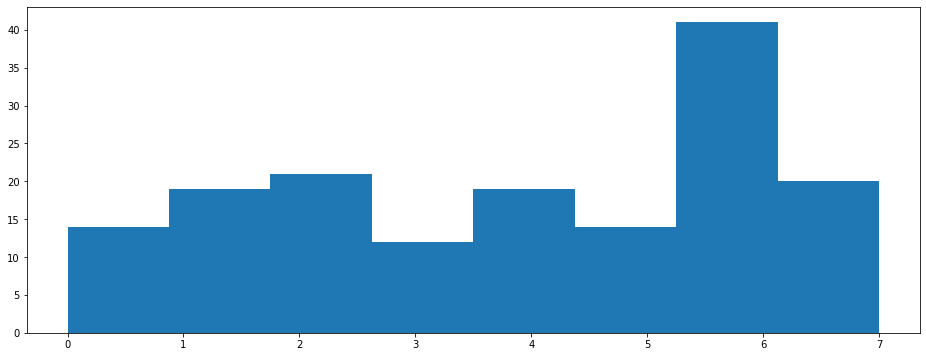

In [12]:
import matplotlib.pyplot as plt

print(len(y_pred))
plt.figure(figsize=(16,6))
plt.hist(y_pred, 8)

In [13]:
from sklearn.linear_model import RidgeClassifier
random_state = 2
#clf = MLPClassifier(solver=solver, alpha=1e-1, hidden_layer_sizes=(20,20,20,20),
#                    random_state=random_state, max_iter=10000)
clf = RidgeClassifier(random_state=random_state, alpha=0.5, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score: ' + str(score))

Score: 0.7547169811320755


In [14]:
from sklearn.linear_model import Lasso

#clf = MLPClassifier(solver=solver, alpha=1e-1, hidden_layer_sizes=(20,20,20,20),
#                    random_state=random_state, max_iter=10000)
clf = Lasso(random_state=random_state, alpha=0.00001, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score: ' + str(score))

Score: 0.22102908207005278


In [15]:
from sklearn.linear_model import LogisticRegression

#clf = MLPClassifier(solver=solver, alpha=1e-1, hidden_layer_sizes=(20,20,20,20),
#                    random_state=random_state, max_iter=10000)
clf = LogisticRegression(random_state=random_state, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Score: ' + str(score))

Score: 0.8490566037735849


In [19]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[ 2,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  5,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  1,  0],
       [ 0,  0,  1,  0,  0,  0, 12,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  7]])

In [17]:
class_columns

Index(['rust_development', 'interface_development', 'big_json',
       'rust_packaging', 'documentation', 'javascript_development',
       'bulk_commit', 'minor_commit'],
      dtype='object')

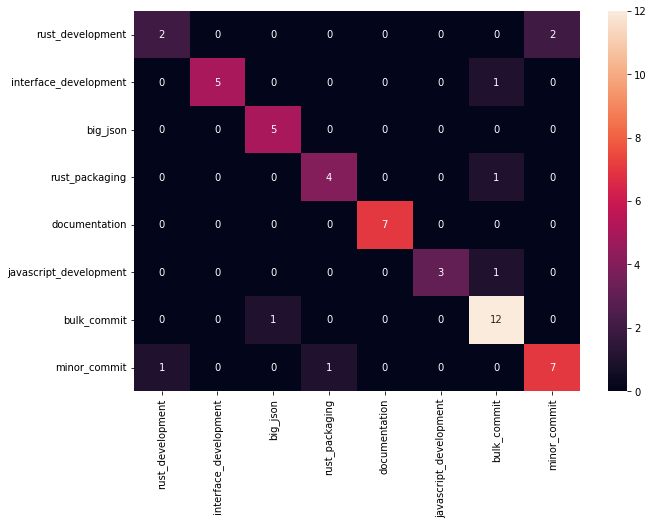

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(conf, index = class_columns,
                  columns = class_columns)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()